In [16]:
!pip install scikit-learn
!pip install scikit-learn matplotlib
!pip install seaborn


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from data_source import DataSource
from extractor import Extractor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# Extraction des données

In [18]:
source = DataSource("./../data.json")
dataframe_list = source.filter([["WC"], ["M"], [], [], ["Q"]], "include", None)
extractor = Extractor(dataframe_list)
athletes = extractor.all_athletes()
athletes_data = {}
for athlete in athletes:
    athletes_data[athlete] = extractor.extract_athlete(athlete)
    # print(athlete,":") # noqa: ERA001
    # print(f"   ski_points: {athletes_data[athlete]["ski_points"]["raw"]["mean"]}")  # noqa: ERA001
    # print(f"   air_points: {athletes_data[athlete]["air_points"]["raw"]["mean"]}") # noqa: ERA001
    # print(f"   time_points: {athletes_data[athlete]["time_points"]["raw"]["mean"]}") # noqa: ERA001

len(athletes_data)

126

# Création d'un DataFrame utilisable pour le clustering

In [19]:
data = []
athlete_names = []

for athlete, attributes in athletes_data.items():
    athlete_names.append(athlete)
    data.append([attributes["ski_points"]["raw"]["mean"], attributes["air_points"]["raw"]["mean"], attributes["time_points"]["raw"]["mean"]])

df_athletes = pd.DataFrame(data, columns=["ski_points", "air_points", "time_points"], index=athlete_names)

df_athletes

,ski_points,air_points,time_points
LESSARD Olivier,40.800000,12.260000,16.400000
KAWAOKA Shima,40.866667,9.506667,16.966667
TAM Ryan,0.300000,6.580000,9.860000
HARVEY Jackson,44.140000,14.070000,14.672000
BONDAREV Anton,28.287500,8.499375,13.440000
...,...,...,...
WENDLER Landon,39.376923,12.190769,14.860769
MURATA Yutaro,40.738462,11.950000,14.913077
MOUILLE Thibaud,38.211765,13.099412,13.251176
VERDAGUER Lucas,28.837500,10.192500,13.535000


# Elbow Method (méthode du coude)
Utilisée pour calculer le meilleur K

Text(0, 0.5, 'Cour du modele (Inertia)')

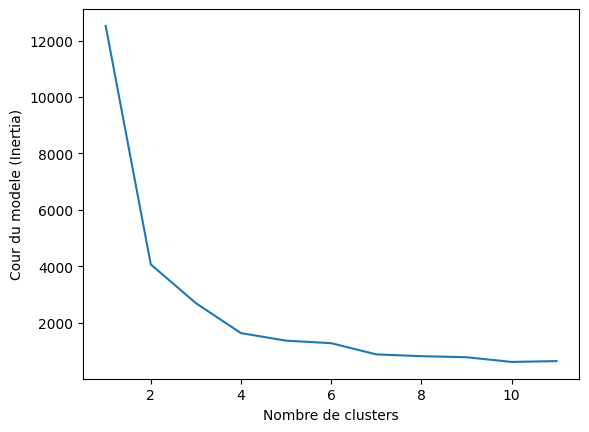

In [20]:
inertia = []
K_range = range(1, 12)
for k in K_range:
    model = KMeans(n_clusters=k).fit(df_athletes)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel("Nombre de clusters")
plt.ylabel("Cour du modele (Inertia)")

# Nettoyage des données (enlever anomalies)

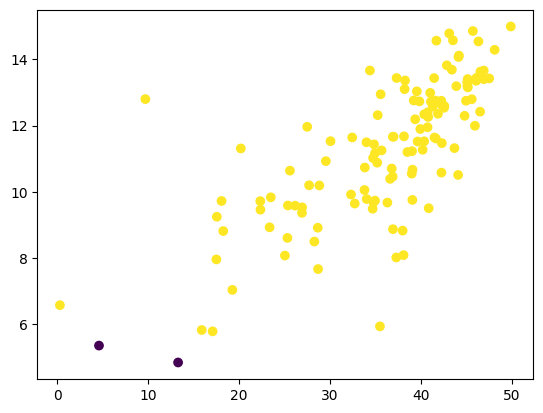

In [21]:
clean_model = IsolationForest(contamination=0.01)
clean_model.fit(df_athletes)
plt.scatter(df_athletes["ski_points"], df_athletes["air_points"], c=clean_model.predict(df_athletes))

# Clustering sur les données

In [22]:
model = KMeans(n_clusters=3)
model.fit(df_athletes)
model.predict(df_athletes)
model.cluster_centers_

array([[34.07116779, 10.45329869, 13.4046816 ],
       [42.92612824, 12.70789572, 15.12024996],
       [18.61345994,  8.55989475, 11.80404989]])

/home/julian/Documents/ENSIMAG/3A/Open-Data/ENSIMAG3A-COD-IA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/julian/Documents/ENSIMAG/3A/Open-Data/ENSIMAG3A-COD-IA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/julian/Documents/ENSIMAG/3A/Open-Data/ENSIMAG3A-COD-IA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/julian/Documents/ENSIMAG/3A/Open-Data/ENSIMAG3A-COD-IA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/julian/Documents/ENSIMAG/3A/Open-Data/ENSIMAG3A-COD-IA/.venv/lib/python3.12

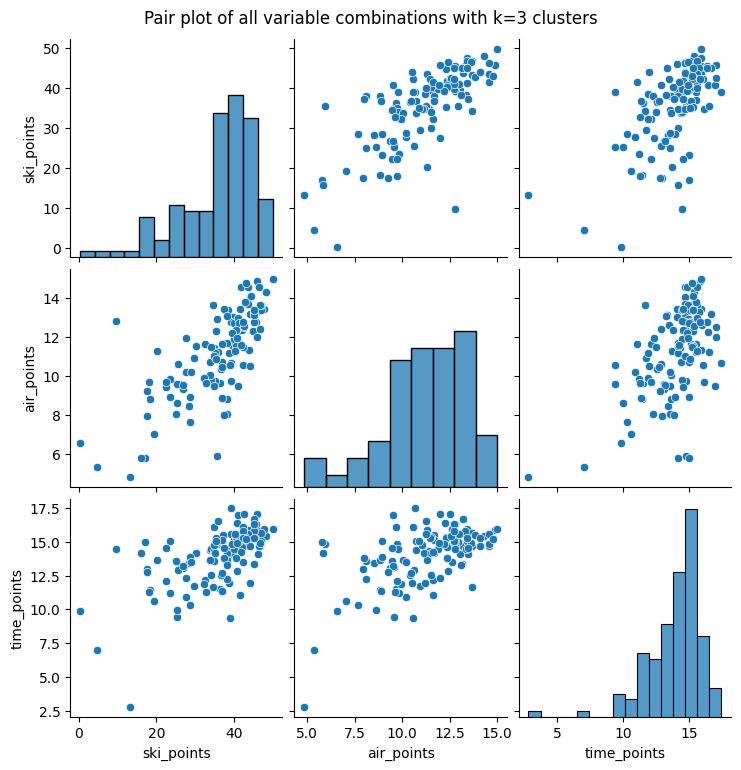

In [23]:
sns.pairplot(df_athletes, palette="Set1")

# Afficher le plot
plt.suptitle("Pair plot of all variable combinations with k=3 clusters", y=1.02)  # Titre général
plt.show()

# Réduction de la dimension

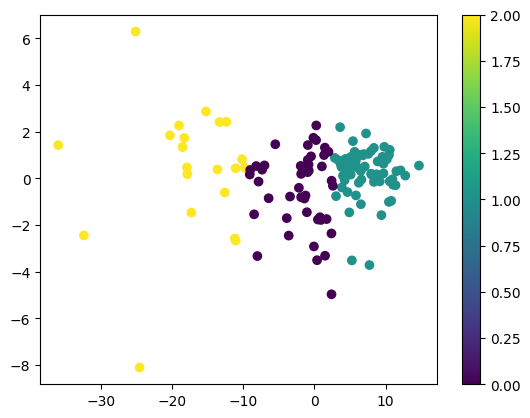

In [24]:
reduct_model = PCA(n_components=2)
athletes_reduced = reduct_model.fit_transform(df_athletes)
plt.scatter(athletes_reduced[:, 0], athletes_reduced[:, 1], c=model.predict(df_athletes))  # Pas sur du c=...
plt.colorbar()

In [25]:
reduct_model.components_

array([[ 0.97584112,  0.17031377,  0.13684786],
       [-0.19797727,  0.4243906 ,  0.88357095]])